## Métricas de classificação (Descrição)

1. Implemente as seguintes métricas de classificação:
    - As métricas devem funcionar para classificação binária ou mesmo para múltiplas classes. Dica: você pode usar a função confusion_matrix do Scikit Learn para construir uma matriz de confusão e facilitar os seus cálculos. As métricas devem retornar a média ponderada com pesos baseados no suporte.
        - accuracy
        - precision
        - recall
        - f1_measure
2. Divida de forma estratificada o Dataset Iris em apenas 10% para treino e 90% para teste. Essa divisão não é usual, mas vamos usar para tornar o problema mais desafiador.
    - Faça a standardização dos dados.
3. Crie um modelo preditivo de classificação multi-classe usando Logistic Regression.
    - Dica: você pode usar os parâmetros: multi_class='auto', solver='lbfgs'
4. Avalie usando suas implementações das métricas: accuracy, precision, recall e f1_measure.
5. Desenhe a curva ROC para a classe Iris-virginica usando a implementação do sklearn.
    - use a função roc_auc_score(y_true, y_score).
    - preste atenção que y_score é diferente de y_pred.
6. Calcule a métrica AUC (Area Under Curve) para a classe Iris-virginica usando a implementação do sklearn.

### Importações

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Importando, normalizando e dividindo os dados

In [2]:
data = load_iris()
X = data.data
y = data.target
targetNames = list(data.target_names)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Treinando e avaliando o modelo utilizando Regressão Logística

In [4]:
clf = LogisticRegression(multi_class='auto', solver='lbfgs', random_state=42)
clf.fit(X_train_std, y_train)

y_pred = clf.predict(X_test_std)

#### Calculando as métricas

In [5]:
def metricasMatrizConfusao(y_test, y_pred, targetNames):
  result = []
  for ind, _ in enumerate(targetNames):
    tp = 0    # Verdadeiro positivo
    fp = 0    # Falso positivo
    tn = 0    # Verdadeiro negativo
    fn = 0    # Falso negativo

    for real, prev in zip(y_test, y_pred):
      if real == ind and prev == ind:
        tp += 1
      elif real != ind and prev == ind:
        fp += 1
      elif real != ind and prev != ind:
        tn += 1
      elif real == ind and prev != ind:
        fn += 1
    result.append({'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn})

  return result

result = metricasMatrizConfusao(y_test, y_pred, targetNames)
result

[{'TP': 44, 'FP': 0, 'TN': 90, 'FN': 1},
 {'TP': 41, 'FP': 3, 'TN': 87, 'FN': 4},
 {'TP': 43, 'FP': 4, 'TN': 86, 'FN': 2}]

In [6]:
def calculateMetrics(result):
  acc = []
  prec = []
  rec = []
  f1m = []
  for elem in result:
    acc.append((elem['TP'] + elem['TN']) / (elem['TP'] + elem['FP'] + elem['TN'] + elem['FN']))
    prec.append(elem['TP'] / (elem['TP'] + elem['FP']))
    rec.append(elem['TP'] / (elem['TP'] + elem['FN']))
    f1m.append(2 * (prec[-1] * rec[-1]) / (prec[-1] + rec[-1]))

  result =  {
    "accurancy": acc,
    "precision": prec,
    "recall": rec,
    "f1_measure": f1m
  }
  
  return result

In [7]:
def calcMedias(values):
    return sum(values) / len(values)

In [8]:
accurancy, precision, recall, f1_measure = calculateMetrics(result).values()

print(f"accurancy: {accurancy} média {calcMedias(accurancy)}")
print(f"precision: {precision} média {calcMedias(precision)}")
print(f"recall: {recall} média {calcMedias(recall)}")
print(f"f1_measure: {f1_measure} média {calcMedias(f1_measure)}")


accurancy: [0.9925925925925926, 0.9481481481481482, 0.9555555555555556] média 0.9654320987654321
precision: [1.0, 0.9318181818181818, 0.9148936170212766] média 0.948903932946486
recall: [0.9777777777777777, 0.9111111111111111, 0.9555555555555556] média 0.9481481481481482
f1_measure: [0.9887640449438202, 0.9213483146067416, 0.9347826086956522] média 0.9482983227487379


### Curva ROC - Classe Iris-virginica VS as outras classes

In [9]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

In [10]:
y_score = clf.predict_proba(X_test_std)

auc_ovr = roc_auc_score(y_test, y_score, multi_class="ovr", average="micro")
print(f"ROC AUC score (One-vs-Rest): {auc_ovr:.2f}")

ROC AUC score (One-vs-Rest): 0.99


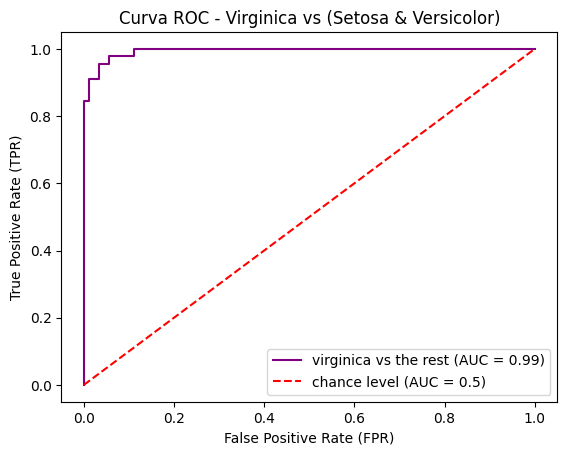

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

label_binarizer = LabelBinarizer().fit(y_train)
y_onHot_test = label_binarizer.transform(y_test)

RocCurveDisplay.from_predictions(y_onHot_test[:, 2], y_score[:, 2], name=f"virginica vs the rest", color="purple")
plt.plot([0, 1], [0, 1], "r--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC - Virginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()
